In [5]:
import os
import zipfile

local_zip = "C:\\Users\\TANMAY KAMEWAL\\Downloads\\test_set.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [15]:
train_dir = "C:\\Users\\TANMAY KAMEWAL\\OneDrive\\Desktop\\DeepLearning\\CNN\\test_set\\test_set"
train_cat_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [16]:
train_cat_names = os.listdir( train_cat_dir )
train_dog_names = os.listdir( train_dogs_dir )

print("Total Cats Images are: ",len(train_cat_names))
print("Total Dogs Images are: ",len(train_dog_names))

print(train_cat_names[:10])
print(train_dog_names[:10])

Total Cats Images are:  1012
Total Dogs Images are:  1013
['cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4006.jpg', 'cat.4007.jpg', 'cat.4008.jpg', 'cat.4009.jpg', 'cat.4010.jpg']
['dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg', 'dog.4010.jpg']


In [26]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 4

pic_index = 0

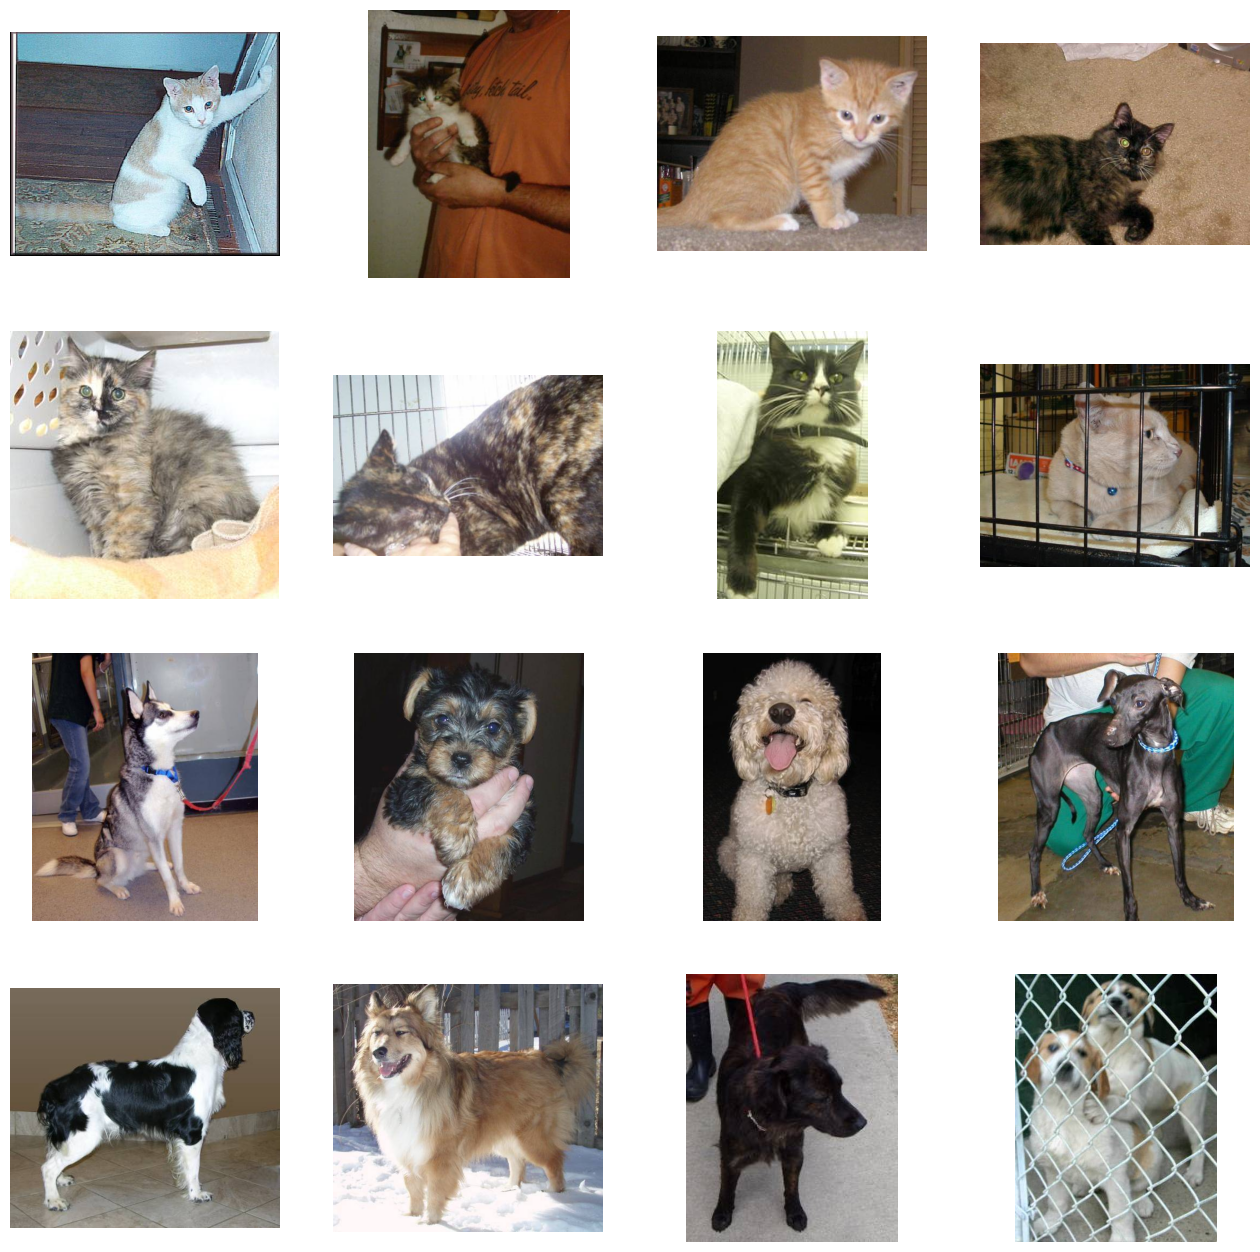

In [27]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cat_dir, fname)
                  for fname in train_cat_names[pic_index - 8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                  for fname in train_dog_names[pic_index - 8:pic_index]]
for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [28]:
import tensorflow as tf

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [31]:
from tensorflow.keras.optimizers import RMSprop

In [35]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150, 150))

Found 2023 images belonging to 2 classes.


In [38]:
history = model.fit(train_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   verbose=2)

Epoch 1/15
100/100 - 70s - loss: 0.7738 - accuracy: 0.5224 - 70s/epoch - 701ms/step
Epoch 2/15
100/100 - 31s - loss: 0.6666 - accuracy: 0.6087 - 31s/epoch - 307ms/step
Epoch 3/15
100/100 - 38s - loss: 0.6083 - accuracy: 0.6692 - 38s/epoch - 383ms/step
Epoch 4/15
100/100 - 43s - loss: 0.5623 - accuracy: 0.7110 - 43s/epoch - 425ms/step
Epoch 5/15
100/100 - 32s - loss: 0.5163 - accuracy: 0.7363 - 32s/epoch - 316ms/step
Epoch 6/15
100/100 - 34s - loss: 0.4712 - accuracy: 0.7670 - 34s/epoch - 339ms/step
Epoch 7/15
100/100 - 33s - loss: 0.4216 - accuracy: 0.7988 - 33s/epoch - 328ms/step
Epoch 8/15
100/100 - 33s - loss: 0.3699 - accuracy: 0.8411 - 33s/epoch - 334ms/step
Epoch 9/15
100/100 - 34s - loss: 0.3010 - accuracy: 0.8709 - 34s/epoch - 344ms/step
Epoch 10/15
100/100 - 36s - loss: 0.2177 - accuracy: 0.9092 - 36s/epoch - 360ms/step
Epoch 11/15
100/100 - 34s - loss: 0.1433 - accuracy: 0.9445 - 34s/epoch - 338ms/step
Epoch 12/15
100/100 - 42s - loss: 0.0990 - accuracy: 0.9637 - 42s/epoch - 

In [41]:
import numpy as np
from keras.preprocessing import image
path = 'path'
img = image.load_img(path, target_size= (150, 150))

x = image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.cstack([x])

classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0:
    print("It's a Dog...")
else:
    print("It's a Cat...")
    

FileNotFoundError: [Errno 2] No such file or directory: 'path'

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot (epochs, acc)
plt.plot (epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()
plt.plot (epochs, acc)
plt.plot (epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()